# Coronavirus France Cases Vizualisations

In [1]:
### import libraries
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
print('Libraries imported.')

Libraries imported.


In [2]:
warnings.filterwarnings("ignore")

In [3]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_df = confirmed_df[confirmed_df['Country/Region']=='France']
deaths_df = deaths_df[deaths_df['Country/Region']=='France']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='France']

In [5]:
confirmed_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
deaths_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
recoveries_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)

In [6]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [7]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [8]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [9]:
###Convert integer into datetime for better visualization
start = '1/24/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [10]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [11]:
###Future forecast
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

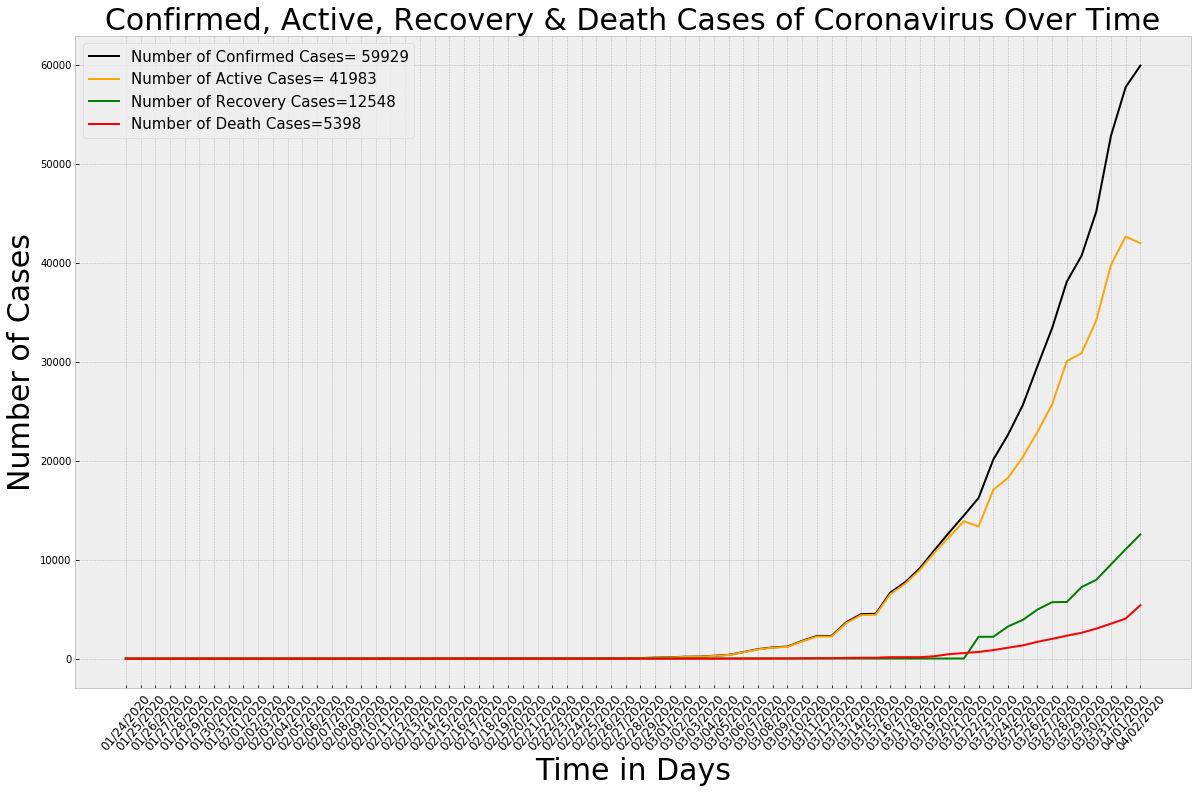

In [12]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.figure(figsize=(20, 12))
plt.style.use('bmh')
plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Confirmed, Active, Recovery & Death Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_cases_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

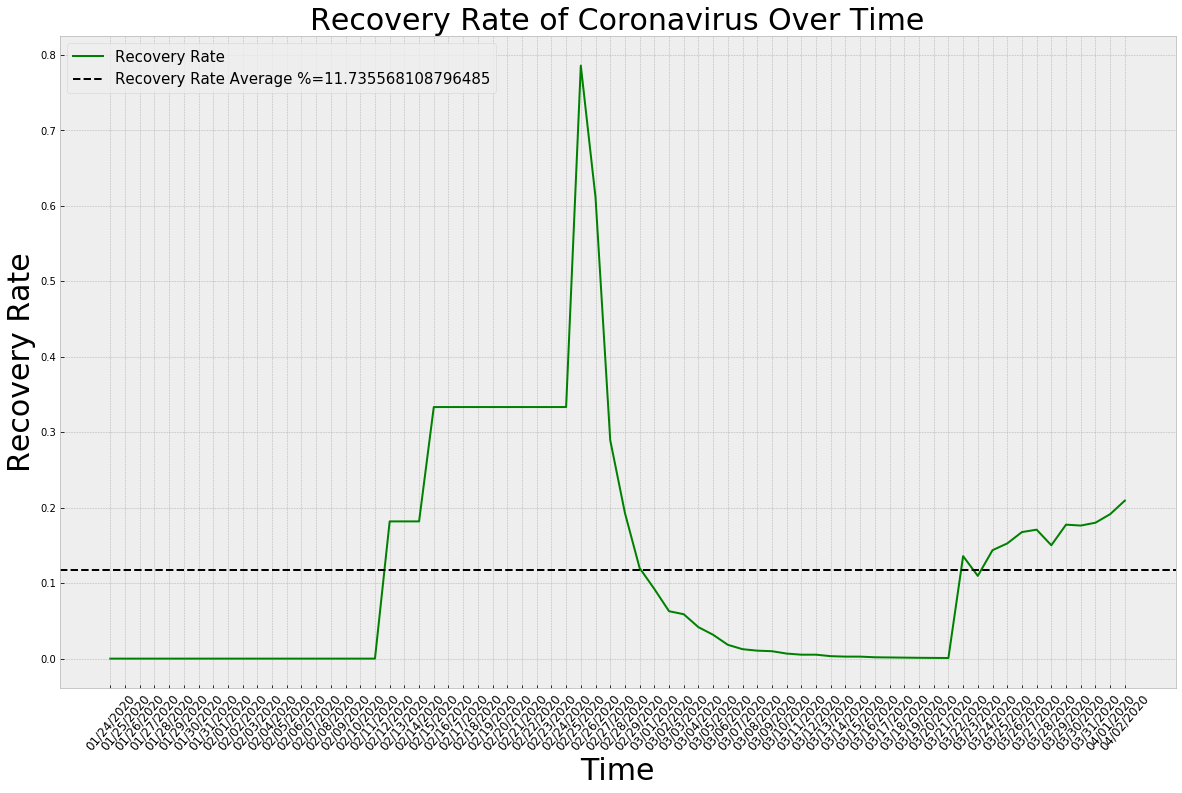

In [13]:
###Recovery Rate of Coronavirus Over Time
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_recovery_rate*100)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

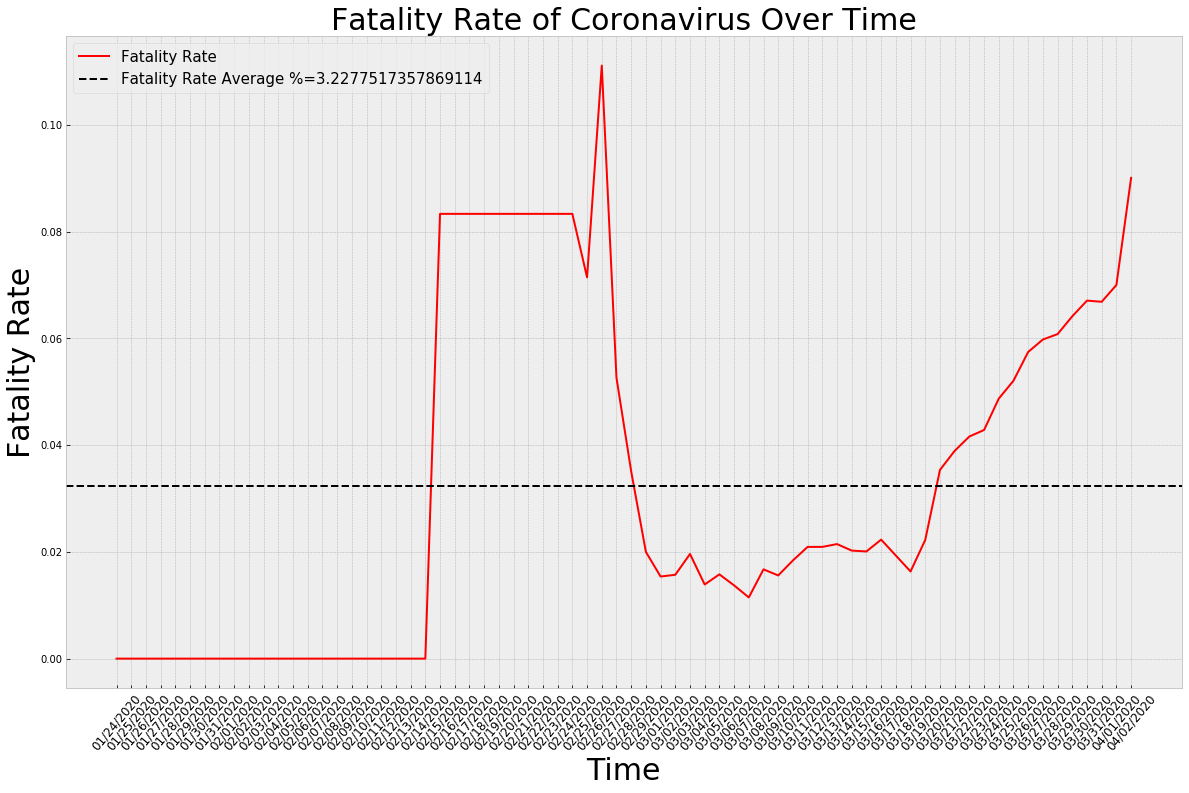

In [14]:
###Mortality Rate of Coronavirus Over Time
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Fatality Rate of Coronavirus Over Time', size=30)
plt.legend(['Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Fatality Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

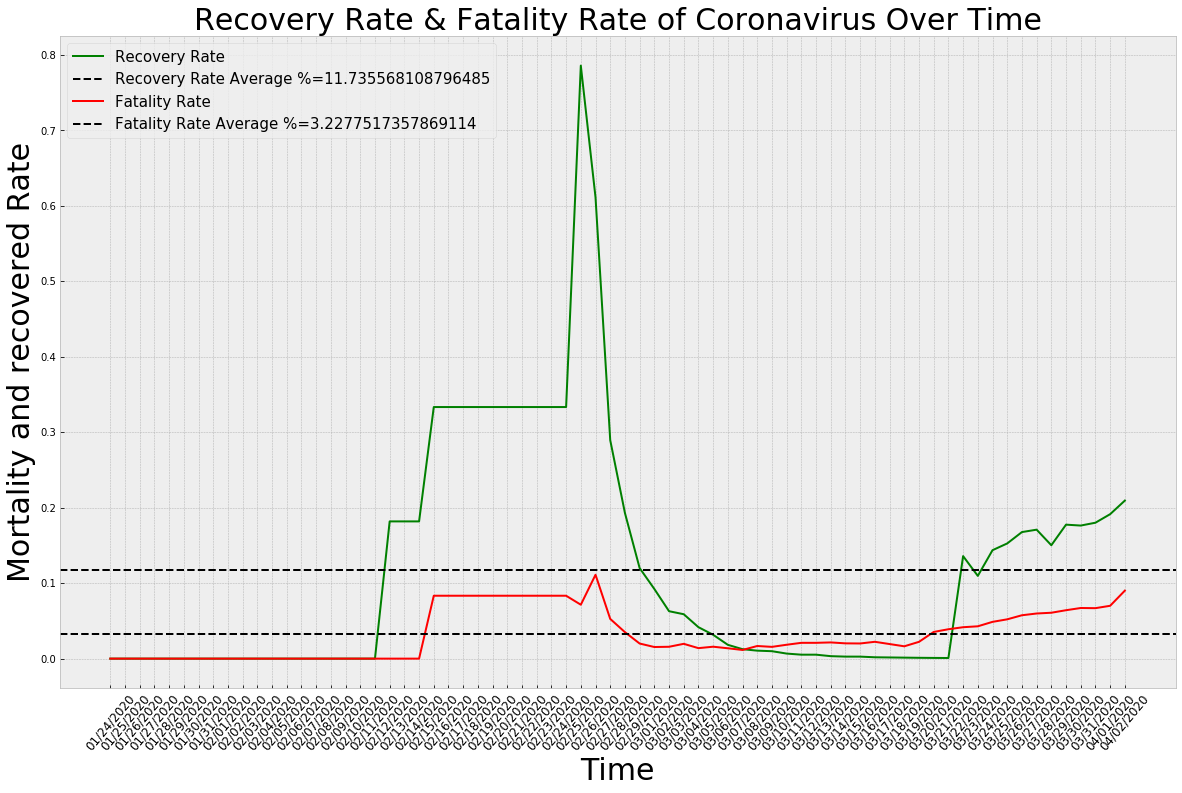

In [15]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_recovery_rate = np.mean(recovery_rate)
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate & Fatality Rate of Coronavirus Over Time', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_recovery_rate*100),'Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality and recovered Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

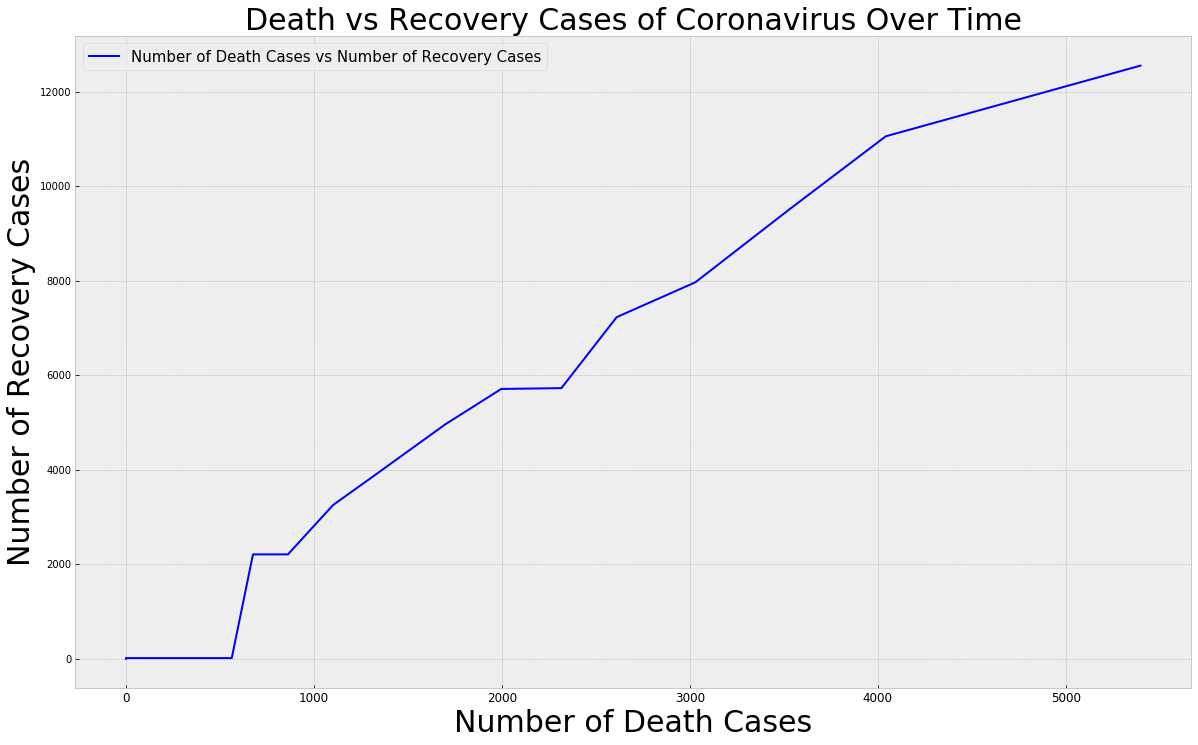

In [16]:
##Dead Cases vs recovered Cases
plt.figure(figsize=(20, 12))
plt.plot(total_deaths, total_recovered, color='blue')
plt.title('Death vs Recovery Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Death Cases vs Number of Recovery Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Death Cases', size=30)
plt.ylabel('Number of Recovery Cases', size=30)
plt.xticks(size=12)
plt.show()

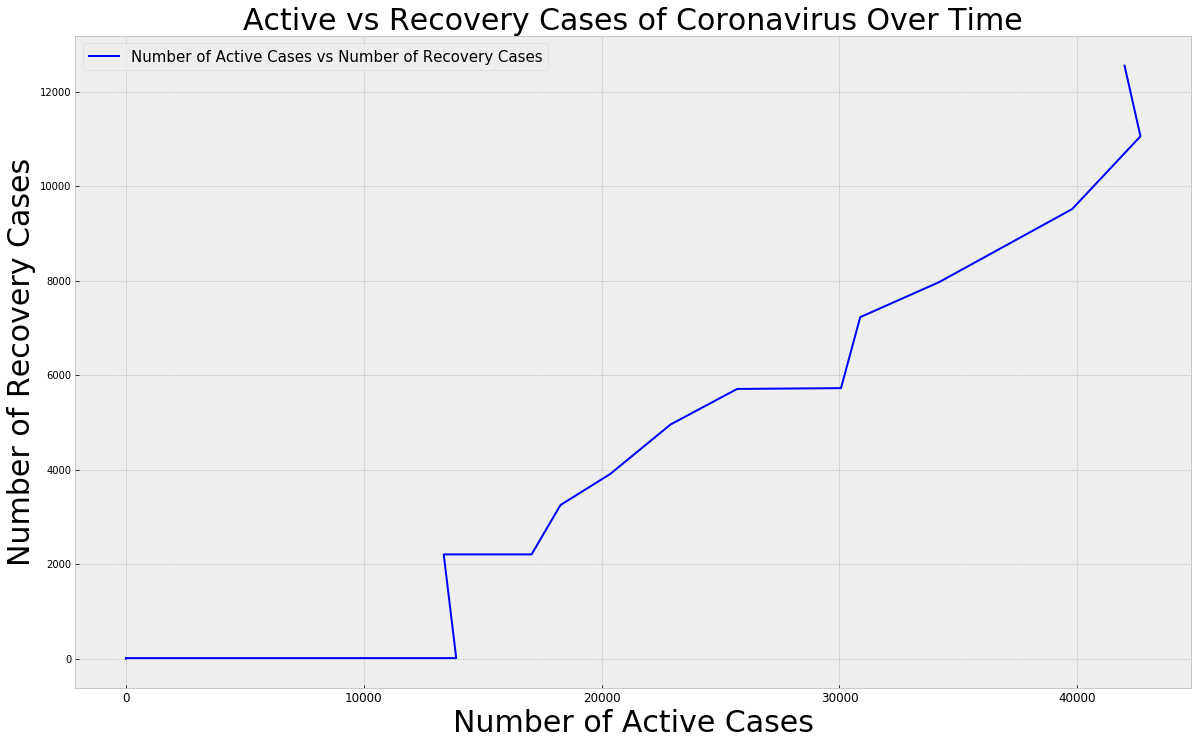

In [17]:
##Active vs recovered Cases Cases
plt.figure(figsize=(20, 12))
plt.plot(active_cases, total_recovered, color='blue')
plt.title('Active vs Recovery Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active Cases vs Number of Recovery Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Active Cases', size=30)
plt.ylabel('Number of Recovery Cases', size=30)
plt.xticks(size=12)
plt.show()

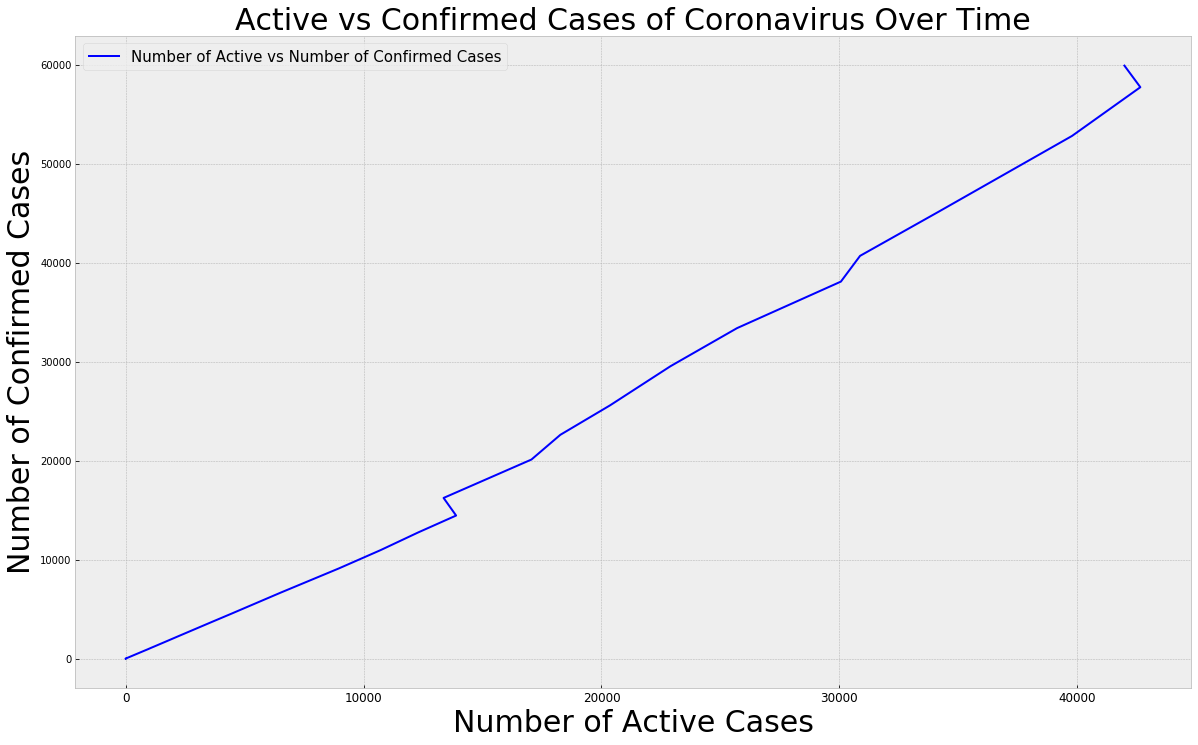

In [18]:
##Active vs Confirmed Cases
plt.figure(figsize=(20, 12))
plt.plot(active_cases, world_cases, color='blue')
plt.title('Active vs Confirmed Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active vs Number of Confirmed Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Active Cases', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.xticks(size=12)
plt.show()

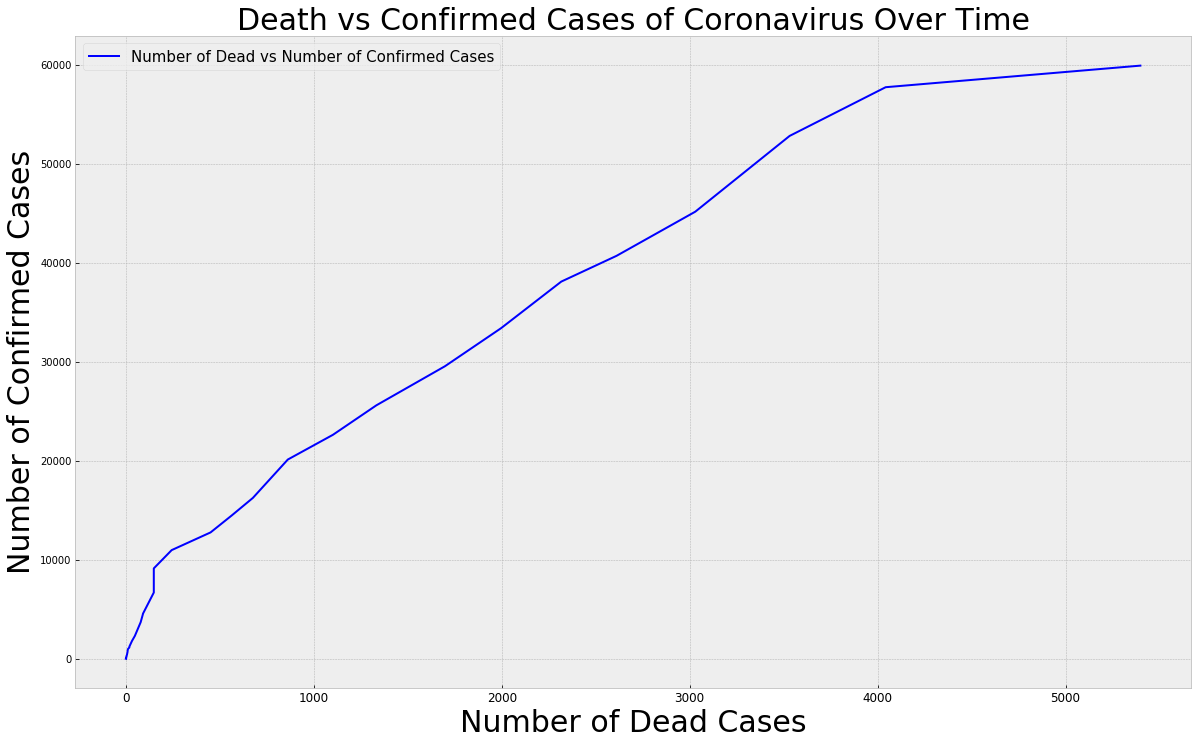

In [19]:
##Dead vs Confirmed Cases
plt.figure(figsize=(20, 12))
plt.plot(total_deaths, world_cases, color='blue')
plt.title('Death vs Confirmed Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Dead vs Number of Confirmed Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Dead Cases', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.xticks(size=12)
plt.show()

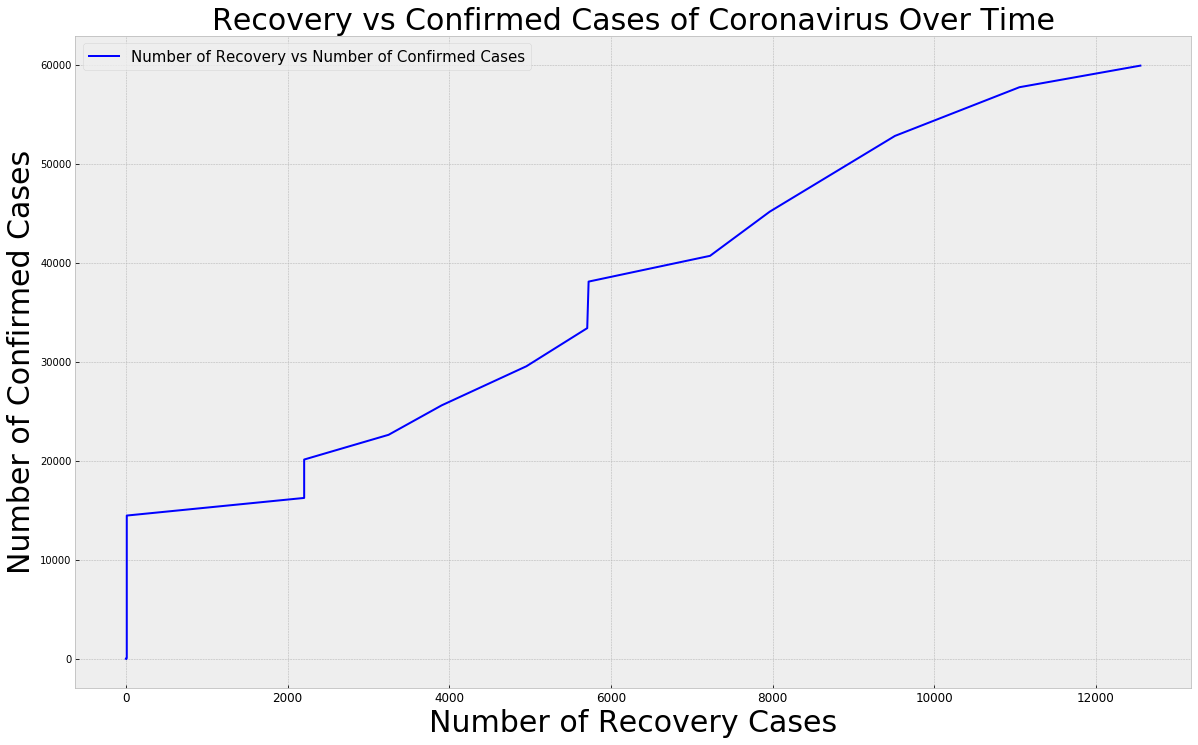

In [20]:
##Recovered vs Confirmed Cases
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, world_cases, color='blue')
plt.title('Recovery vs Confirmed Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Recovery vs Number of Confirmed Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Recovery Cases', size=30)
plt.ylabel('Number of Confirmed Cases', size=30)
plt.xticks(size=12)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
# Train parameters to predict labels, use 10% for Test set
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22, total_recovered, test_size=0.1, shuffle=False)
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.1, shuffle=False)
X_train_active, X_test_active, y_train_active, y_test_active = train_test_split(days_since_1_22, active_cases, test_size=0.1, shuffle=False) 
X_train_mortality, X_test_mortality, y_train_mortality, y_test_mortality = train_test_split(days_since_1_22, mortality_rate , test_size=0.1, shuffle=False) 
X_train_recovery, X_test_recovery, y_train_recovery, y_test_recovery = train_test_split(days_since_1_22, recovery_rate, test_size=0.1, shuffle=False) 

In [23]:
kernel = ['poly', 'linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_pred_confirmed = svm_confirmed.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_active, y_train_active.ravel())
svm_search.best_params_
svm_active = svm_search.best_estimator_
svm_pred_active = svm_active.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_recovered, y_train_confirmed.ravel())
svm_search.best_params_
svm_recovered = svm_search.best_estimator_
svm_pred_recovered = svm_recovered.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_deaths, y_train_confirmed.ravel())
svm_search.best_params_
svm_deaths = svm_search.best_estimator_
svm_pred_deaths = svm_deaths.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_mortality, y_train_mortality)
svm_search.best_params_
svm_mortality = svm_search.best_estimator_
svm_pred_mortality = svm_mortality.predict(future_forcast)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_recovery, y_train_recovery)
svm_search.best_params_
svm_recovery = svm_search.best_estimator_
svm_pred_recovery = svm_recovery.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.9min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   46.7s finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.7min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 26.4min finished


In [24]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)

In [25]:
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred_confirmed = linear_model.predict(X_test_confirmed)
linear_pred_confirmed = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_confirmed, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred_confirmed, y_test_confirmed))

MAE: 37561.10105069125
MSE: 1494716260.3140094


In [26]:
linear_model.fit(X_train_active, y_train_active)
test_linear_pred_active = linear_model.predict(X_test_active)
linear_pred_active = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_active, y_test_active))
print('MSE:',mean_squared_error(test_linear_pred_active, y_test_active))

MAE: 26947.4468202765
MSE: 760294706.800939


In [27]:
linear_model.fit(X_train_recovered, y_train_recovered)
test_linear_pred_recovered = linear_model.predict(X_test_recovered)
linear_pred_recovered = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_recovered, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred_recovered, y_test_recovered))

MAE: 7711.506248847925
MSE: 65254530.06661101


In [28]:
linear_model.fit(X_train_deaths, y_train_deaths)
test_linear_pred_deaths = linear_model.predict(X_test_deaths)
linear_pred_deaths = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_deaths, y_test_deaths))
print('MSE:',mean_squared_error(test_linear_pred_deaths, y_test_deaths))

MAE: 2902.14798156682
MSE: 9572604.116105638


In [29]:
linear_model.fit(X_train_mortality, y_train_mortality)
test_linear_pred_mortality = linear_model.predict(X_test_mortality)
linear_pred_mortality = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_mortality, y_test_mortality))
print('MSE:',mean_squared_error(test_linear_pred_mortality, y_test_mortality))

MAE: 0.014518404560625935
MSE: 0.00027682334719827945


In [30]:
linear_model.fit(X_train_recovery, y_train_recovery)
test_linear_pred_recovery = linear_model.predict(X_test_recovery)
linear_pred_recovery = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred_recovery, y_test_recovery))
print('MSE:',mean_squared_error(test_linear_pred_recovery, y_test_recovery))

MAE: 0.008731383290317854
MSE: 0.00015832851911867137


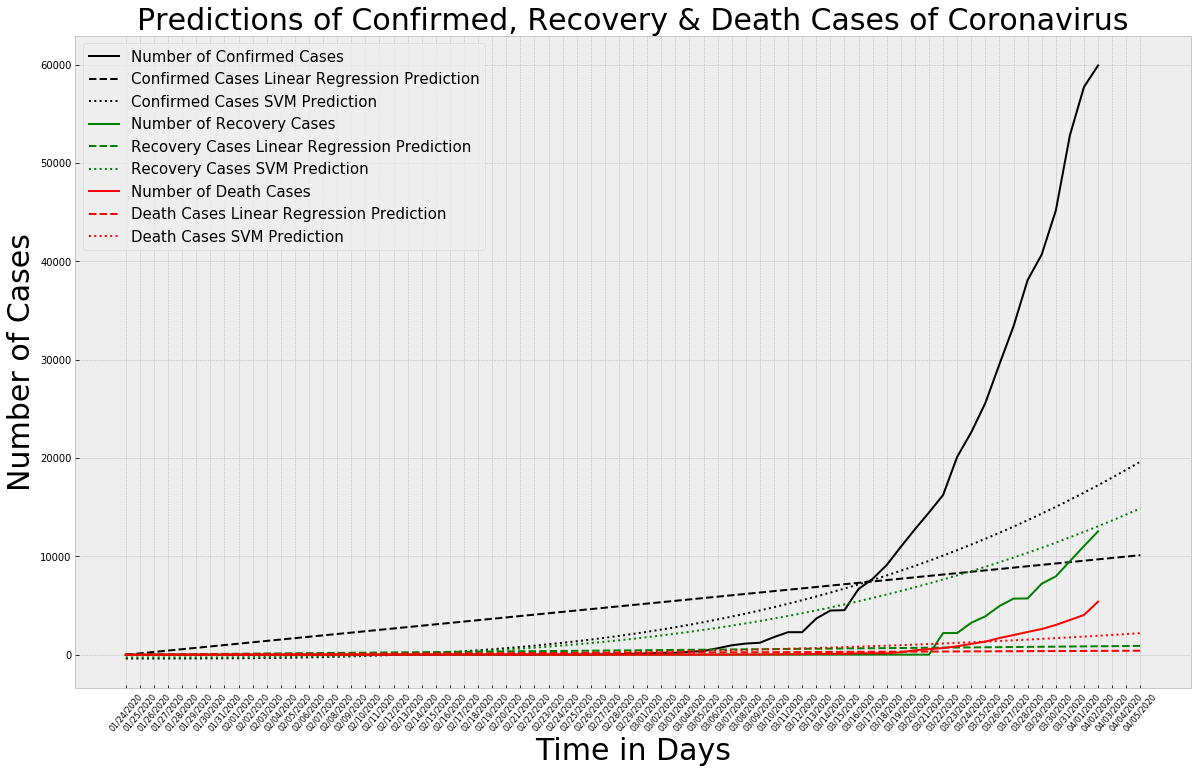

In [31]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(future_forcast_dates, linear_pred_confirmed, linestyle='dashed', color='black')
plt.plot(future_forcast_dates, svm_pred_confirmed, linestyle='dotted', color='black')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(future_forcast_dates, linear_pred_recovered, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_pred_recovered, linestyle='dotted', color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(future_forcast_dates, linear_pred_deaths, linestyle='dashed', color='red')
plt.plot(future_forcast_dates, svm_pred_deaths, linestyle='dotted', color='red')
plt.title('Predictions of Confirmed, Recovery & Death Cases of Coronavirus', size=30)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Linear Regression Prediction', 'Confirmed Cases SVM Prediction', 'Number of Recovery Cases', 'Recovery Cases Linear Regression Prediction', 'Recovery Cases SVM Prediction', 'Number of Death Cases', 'Death Cases Linear Regression Prediction', 'Death Cases SVM Prediction', 'Number of Active Cases', 'Active Cases Linear Regression Prediction', 'Active Cases SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

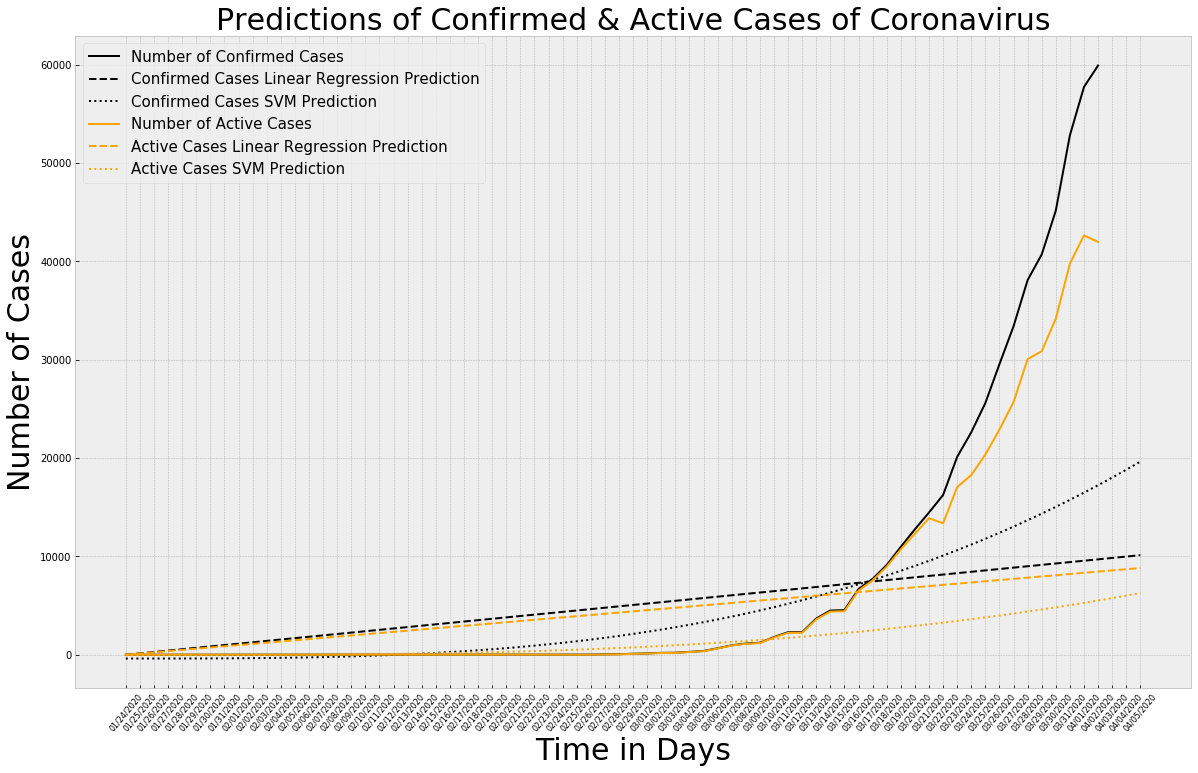

In [32]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='black')
plt.plot(future_forcast_dates, linear_pred_confirmed, linestyle='dashed', color='black')
plt.plot(future_forcast_dates, svm_pred_confirmed, linestyle='dotted', color='black')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(future_forcast_dates, linear_pred_active, linestyle='dashed', color='orange')
plt.plot(future_forcast_dates, svm_pred_active, linestyle='dotted', color='orange')
plt.title('Predictions of Confirmed & Active Cases of Coronavirus', size=30)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Linear Regression Prediction', 'Confirmed Cases SVM Prediction', 'Number of Active Cases', 'Active Cases Linear Regression Prediction', 'Active Cases SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

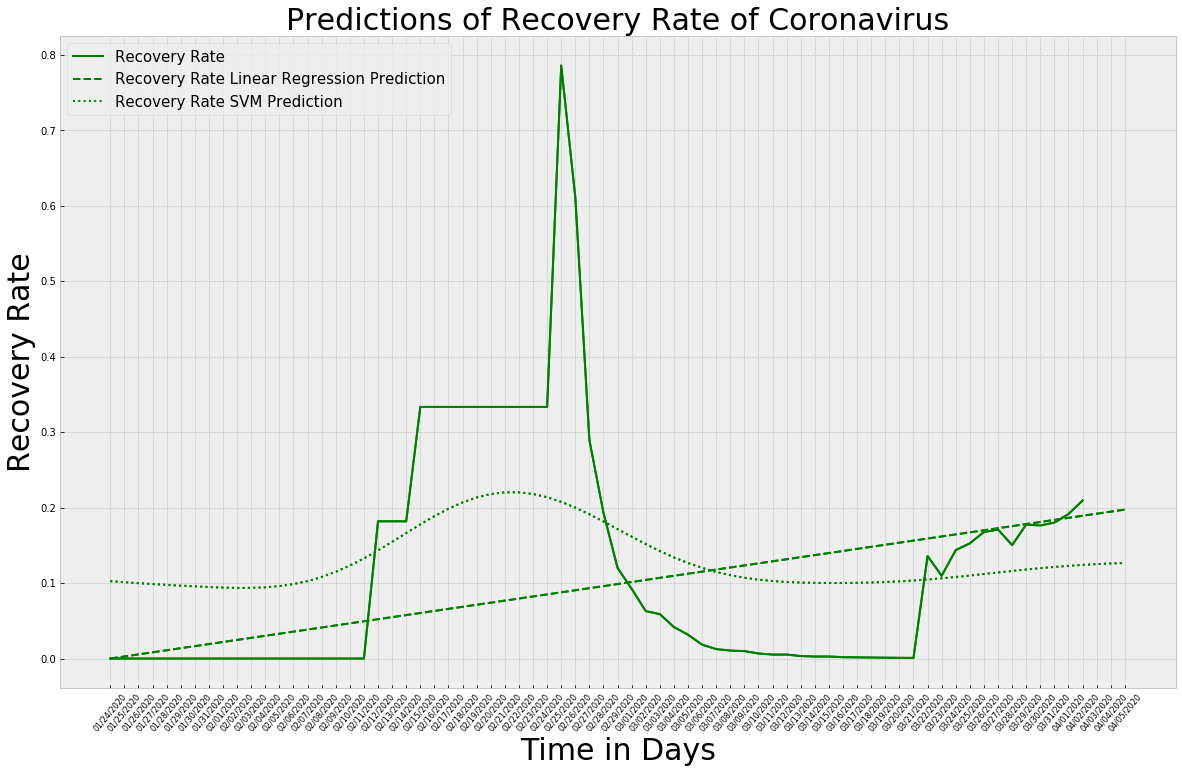

In [33]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.plot(future_forcast_dates, linear_pred_recovery, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_pred_recovery, linestyle='dotted', color='green')
plt.title('Predictions of Recovery Rate of Coronavirus', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Linear Regression Prediction', 'Recovery Rate SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=50, size=8)
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.plot(future_forcast_dates, linear_pred_recovery, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_pred_recovery, linestyle='dotted', color='green')
plt.title('Predictions of Recovery Rate of Coronavirus', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Linear Regression Prediction', 'Recovery Rate SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=50, size=8)
plt.show()

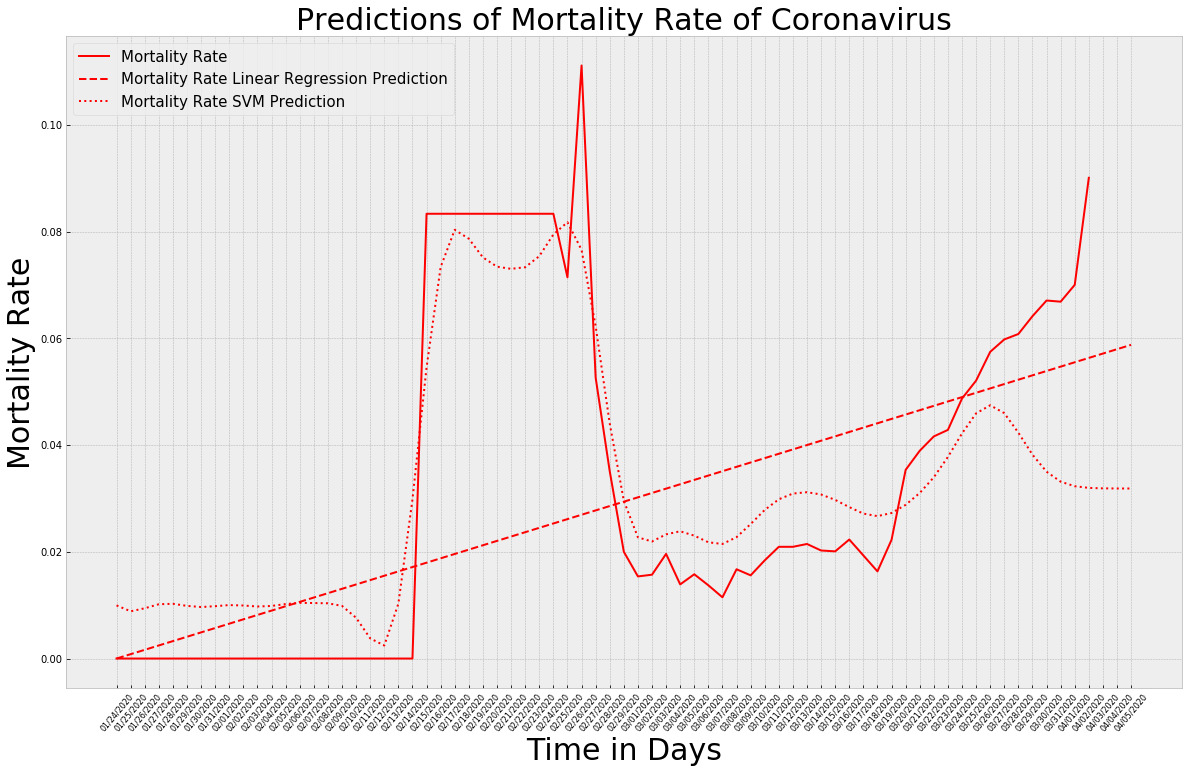

In [34]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.plot(future_forcast_dates, linear_pred_mortality, linestyle='dashed', color='red')
plt.plot(future_forcast_dates, svm_pred_mortality, linestyle='dotted', color='red')
plt.title('Predictions of Mortality Rate of Coronavirus', size=30)
plt.legend(['Mortality Rate', 'Mortality Rate Linear Regression Prediction', 'Mortality Rate SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=8)
plt.show()